In [0]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
from sklearn.datasets import load_digits, load_boston
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV, ParameterGrid, train_test_split
import pandas as pd
import graphviz
from matplotlib import pyplot as plt
import numpy as np

In [0]:
from google.colab import files
!pip install -q kaggle

In [0]:
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
!cp .kaggle/kaggle.json ../root/.kaggle

In [0]:
!kaggle competitions download -c titanic

  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 26.0MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 3.21MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 61.1MB/s]


In [0]:
!ls

gender_submission.csv  sample_data  test.csv  train.csv


## 14.1

In [0]:
titanic_train = pd.read_csv("train.csv")
titanic_train.drop(["Name","PassengerId","Ticket","Cabin"],axis=1,inplace=True)
titanic_tree = DecisionTreeClassifier(max_depth=5)



In [0]:
titanic_train.dropna(inplace=True)

In [0]:
titanic_data = titanic_train.drop(["Survived"],axis=1)
print(titanic_data,len(titanic_data))

titanic_data.Sex = titanic_data.Sex == "male"
embarked = set(titanic_data.Embarked)
embarked = {x:i for i,x in enumerate(embarked)}
tr = [embarked[x] for x in titanic_data.Embarked]
titanic_data.Embarked = pd.Series( tr,titanic_data.index)

titanic_labels = titanic_train.Survived

     Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         3    male  22.0      1      0   7.2500        S
1         1  female  38.0      1      0  71.2833        C
2         3  female  26.0      0      0   7.9250        S
3         1  female  35.0      1      0  53.1000        S
4         3    male  35.0      0      0   8.0500        S
..      ...     ...   ...    ...    ...      ...      ...
885       3  female  39.0      0      5  29.1250        Q
886       2    male  27.0      0      0  13.0000        S
887       1  female  19.0      0      0  30.0000        S
889       1    male  26.0      0      0  30.0000        C
890       3    male  32.0      0      0   7.7500        Q

[712 rows x 7 columns] 712


In [0]:
titanic_tree.fit(titanic_data, titanic_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
titanic_data.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [0]:
export_graphviz(titanic_tree,'titanic.txt',feature_names=titanic_data.columns,class_names=["Did Not Survive","Survived"])
graphviz.render('dot','png','titanic.txt')


'titanic.txt.png'

<img src='~/titanic.txt.png'/>



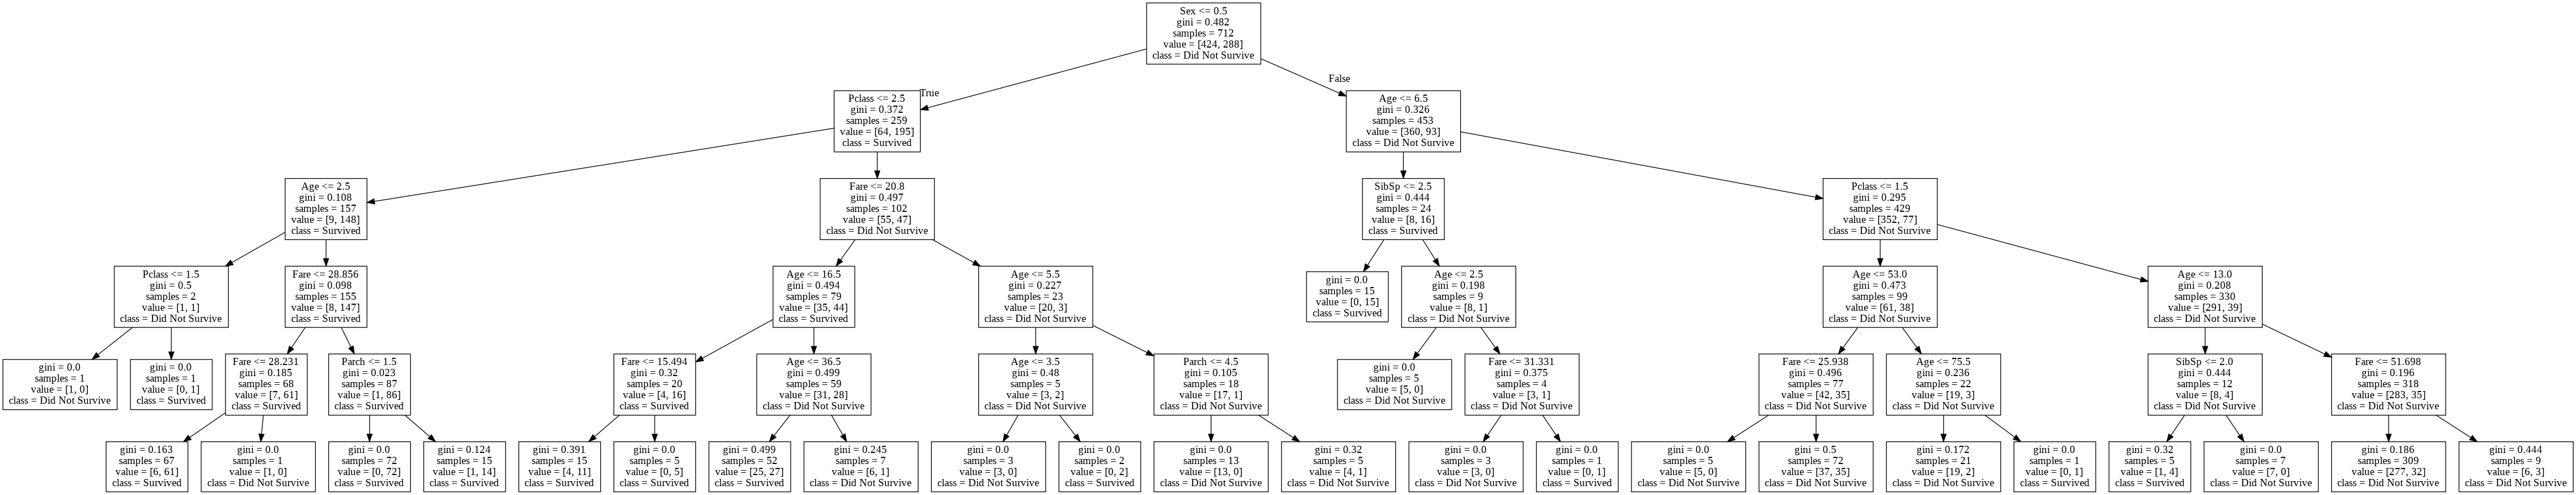

In [0]:
from IPython.display import Image, display
display(Image('titanic.txt.png'))

It appears as though many of the leaf nodes have very low sample counts: take the far left branch, for example. It ends in two leaves with one sample each--this is a blatant example of overfitting and would be unlikely to truly describe the underlying probablilty space.

## 14.1.ii.) Grid search

In [0]:
titanic_cv = DecisionTreeClassifier()
param_dict = {'max_depth':np.array([3,4,5,6]),'min_samples_leaf':np.array([2,4,8,12]),'max_leaf_nodes':np.array([10,12,15,18,20])}
gridcv = GridSearchCV(titanic_cv,param_grid=param_dict)


In [0]:
gridcv.fit(titanic_data,titanic_labels)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([3, 4, 5, 6]),
                

In [0]:
gridcv.best_params_

{'max_depth': 5, 'max_leaf_nodes': 15, 'min_samples_leaf': 4}

In [0]:

export_graphviz(gridcv.best_estimator_,'titanic_cv',feature_names=titanic_data.columns,class_names=["Did Not Survive","Survived"])
graphviz.render('dot','png','titanic_cv')

'titanic_cv.png'

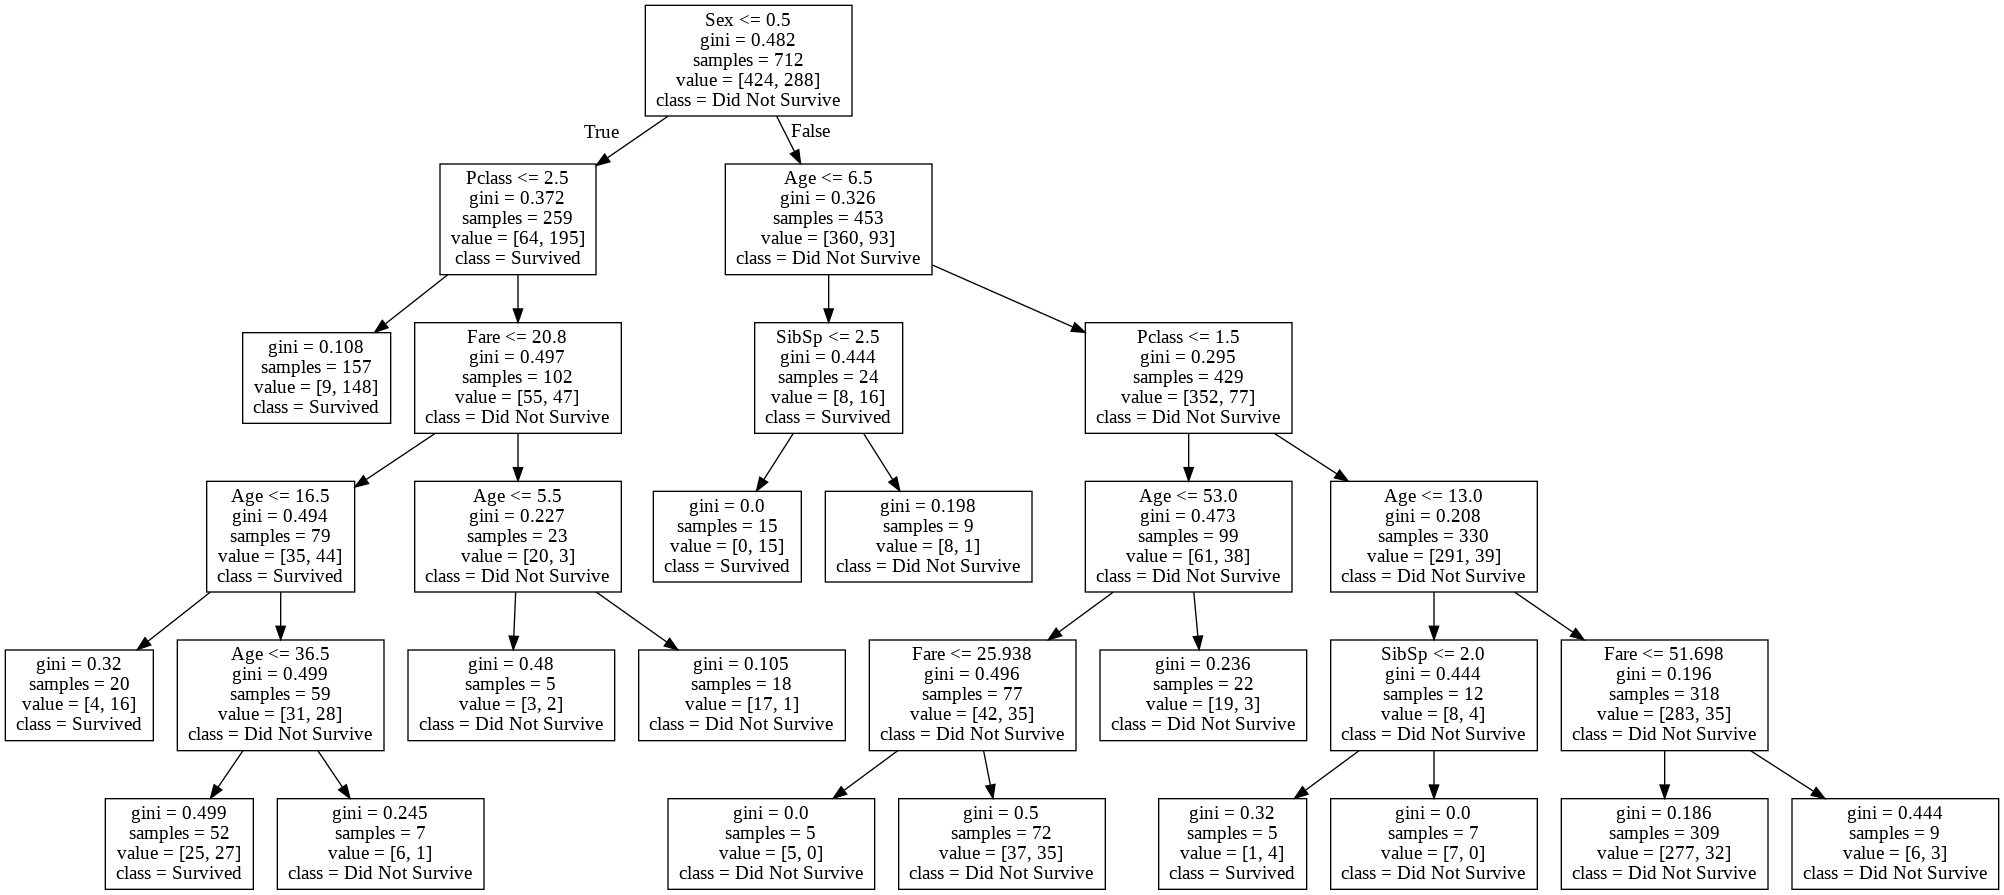

In [0]:
display(Image('titanic_cv.png'))

This is a much smaller tree, but it is also much more "balanced" tree in the sense that each leaf contains enough samples to convincingly say something about the underlying probabiliity space.

## 14.2


In [0]:
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,.2)

In [0]:
digit_tree = DecisionTreeClassifier()
param_dict = {'max_depth':[8,10,12,14],'min_samples_leaf':[1,2,4,6],'max_leaf_nodes':[50,55,60,65,70,75]}
digit_cv = GridSearchCV(digit_tree, param_dict)

In [0]:
digit_cv.fit(X_train,y_train)
digit_cv.best_params_

{'max_depth': 12, 'max_leaf_nodes': 55, 'min_samples_leaf': 1}

In [0]:
# Test the accuracy (1-misclassification rate)
digit_cv.best_estimator_.score(X_test,y_test)

0.8377777777777777

In [0]:
predictions = digit_cv.best_estimator_.predict(X_test)
misclassified = predictions != y_test
for p,y in zip(predictions[misclassified],y_test[misclassified]):
  print("Guess:",p,"Actual",y)

Guess: 2 Actual 3
Guess: 7 Actual 1
Guess: 9 Actual 3
Guess: 2 Actual 9
Guess: 5 Actual 7
Guess: 2 Actual 8
Guess: 1 Actual 3
Guess: 1 Actual 7
Guess: 5 Actual 9
Guess: 2 Actual 3
Guess: 3 Actual 5
Guess: 4 Actual 6
Guess: 5 Actual 0
Guess: 7 Actual 4
Guess: 2 Actual 3
Guess: 5 Actual 9
Guess: 3 Actual 8
Guess: 2 Actual 8
Guess: 9 Actual 1
Guess: 9 Actual 1
Guess: 2 Actual 3
Guess: 5 Actual 3
Guess: 3 Actual 7
Guess: 8 Actual 9
Guess: 2 Actual 6
Guess: 8 Actual 9
Guess: 2 Actual 8
Guess: 5 Actual 3
Guess: 9 Actual 1
Guess: 3 Actual 9
Guess: 2 Actual 5
Guess: 0 Actual 5
Guess: 1 Actual 7
Guess: 2 Actual 3
Guess: 8 Actual 0
Guess: 2 Actual 1
Guess: 1 Actual 6
Guess: 2 Actual 9
Guess: 4 Actual 2
Guess: 7 Actual 3
Guess: 3 Actual 5
Guess: 9 Actual 1
Guess: 1 Actual 4
Guess: 2 Actual 8
Guess: 7 Actual 3
Guess: 4 Actual 3
Guess: 9 Actual 8
Guess: 1 Actual 2
Guess: 1 Actual 8
Guess: 7 Actual 3
Guess: 2 Actual 1
Guess: 1 Actual 7
Guess: 7 Actual 8
Guess: 3 Actual 7
Guess: 7 Actual 3
Guess: 4 A

I was surprised, I wasn't expecting a tree to be so accurate. Nor was I expecting the misclassifications so be so understandible, mistaking very similarly-shaped numbers.

## 14.3 Boston

In [0]:
boston = load_boston()
boston_data = boston.data
boston_target = boston.target

In [0]:
boston_tree = DecisionTreeRegressor()
param_grid = {'max_depth':[4,6,8,10,12],'min_samples_leaf':[1,2,4,8,12],'max_leaf_nodes':[30,40,50,60]}
boston_cv = GridSearchCV(boston_tree,param_grid)

In [0]:
boston_cv.fit(boston_data,boston_target)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, 10, 12],
                         'max_leaf_nodes': [30, 40, 50, 60],
                         'min_samp

In [0]:
export_graphviz(boston_cv.best_estimator_,'boston')
graphviz.render('dot','png','boston')

'boston.png'

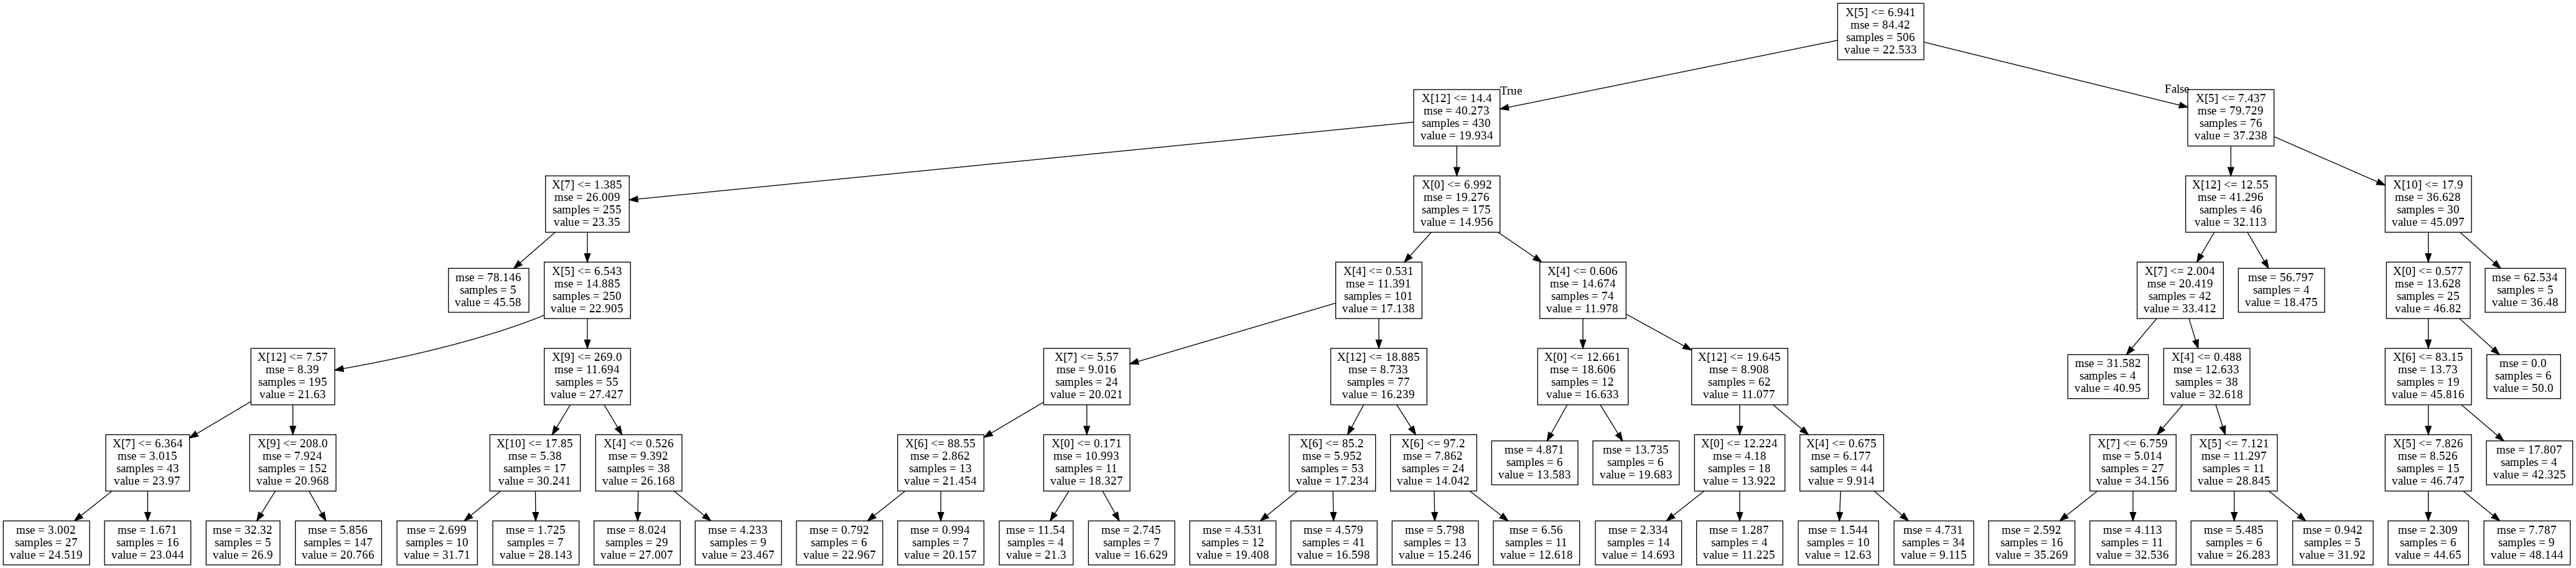

In [0]:
display(Image('boston.png'))

Although the Cross Validation score was better using a deeper tree, it appears to me that most of the important splitting information is taken care of in the first four layers. Everything below that defines very fine-grained differences which do not end up changing too dramatically in value.